In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

In [29]:
def model(x, x0, x1, C, k, a):
    return np.piecewise(
        x,
        [x < x0, (x >= x0) & (x < x1), x >= x1],
        [
            lambda x: C,
            lambda x: C * np.exp(k * (x - x0)),
            lambda x: a * (x - x1) + C * np.exp(k * (x1 - x0))
        ]
    )

In [32]:
p = (3, 6, 1, 0.5, 0.3)

In [33]:
xexp = np.linspace(0, 10, 30)
yexp = model(xexp, *p)

In [39]:
popt, pcov = optimize.curve_fit(model, xexp, yexp, p0=[3, 6, 1, 1, 1])
popt, pcov

(array([3. , 6. , 1. , 0.5, 0.3]),
 array([[ 0., -0.,  0.,  0., -0.],
        [-0.,  0., -0., -0., -0.],
        [ 0., -0.,  0.,  0., -0.],
        [ 0., -0.,  0.,  0., -0.],
        [-0., -0., -0., -0.,  0.]]))

In [40]:
xlin = np.linspace(xexp.min(), xexp.max(), 201)
yhat = model(xlin, *popt)

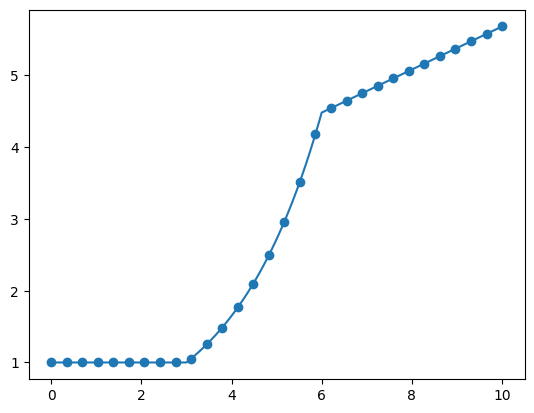

In [41]:
fig, axe = plt.subplots()
axe.scatter(xexp, yexp)
axe.plot(xlin, yhat)